# Вариант №10

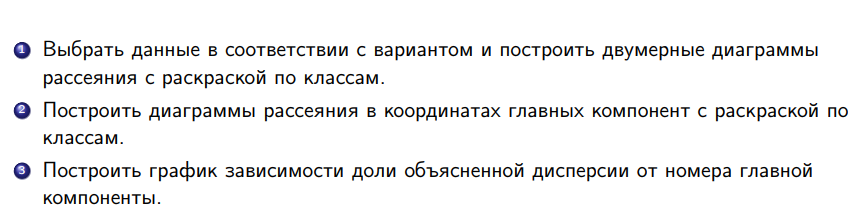

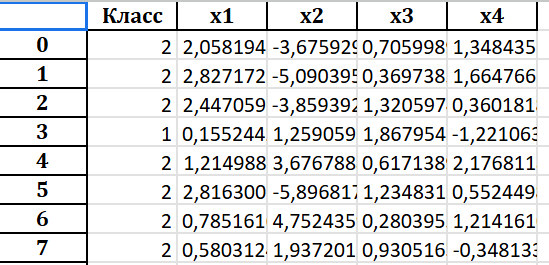

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Выбрать данные в соответствии с вариантом и построить двумерные диаграммы рассеяния с раскраской по классам.


In [40]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/Лабораторная работа 7.xlsx', sheet_name='10').drop('Unnamed: 0', axis=1)
data.head(8)

,Класс,x1,x2,x3,x4
0,2,2.058194,-3.675930,0.705999,1.348435
1,2,2.827172,-5.090396,0.369739,1.664767
2,2,2.447059,-3.859393,1.320597,0.360182
3,1,0.155244,1.259059,1.867954,-1.221063
4,2,1.214989,3.676789,0.617139,2.176812
5,2,2.816300,-5.896817,1.234832,0.552450
6,2,0.785162,4.752436,0.280396,1.214161
7,2,0.580312,1.937201,0.930516,-0.348134


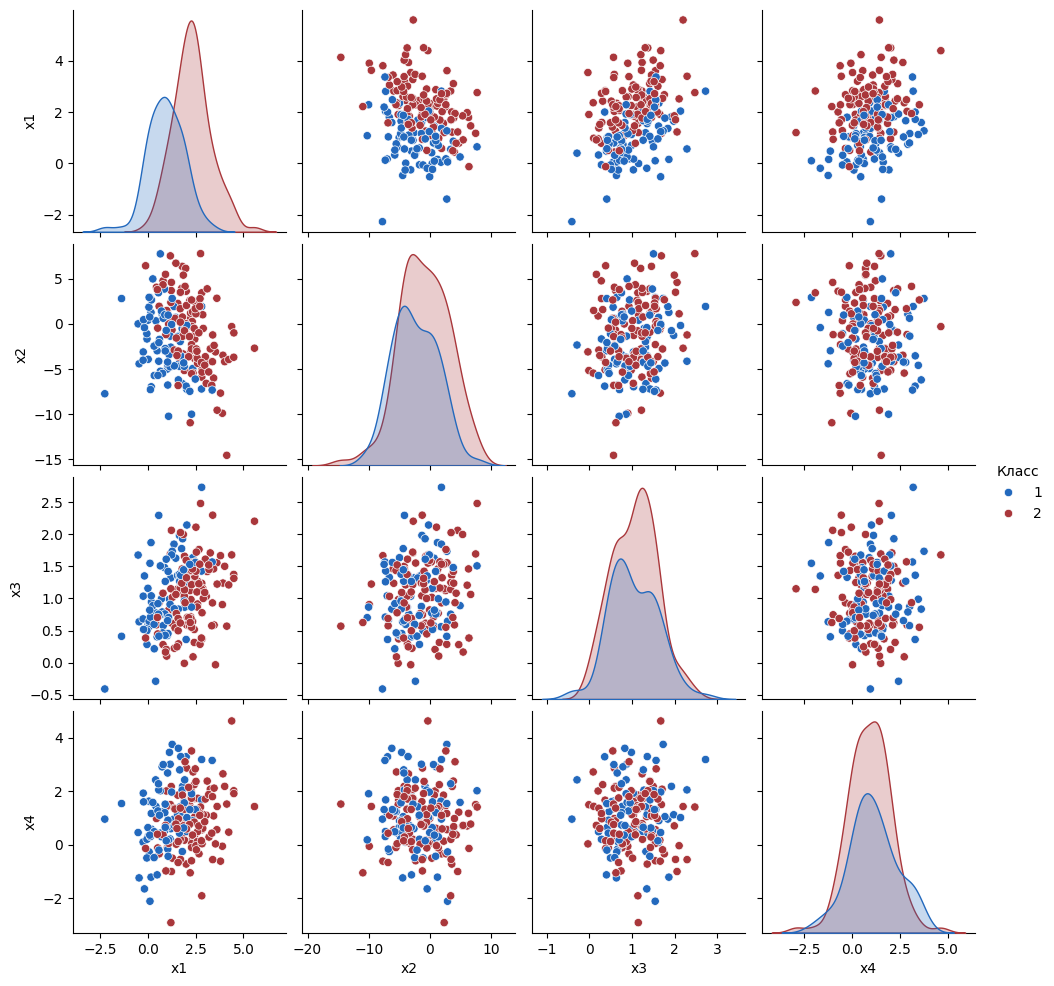

In [41]:
# диаграммы рассеяния с указанием класса
sns.pairplot(data, hue='Класс', palette='vlag')

# Построить диаграммы рассеяния в координатах главных компонент с раскраской по классам.


<Axes: xlabel='PC1', ylabel='PC2'>

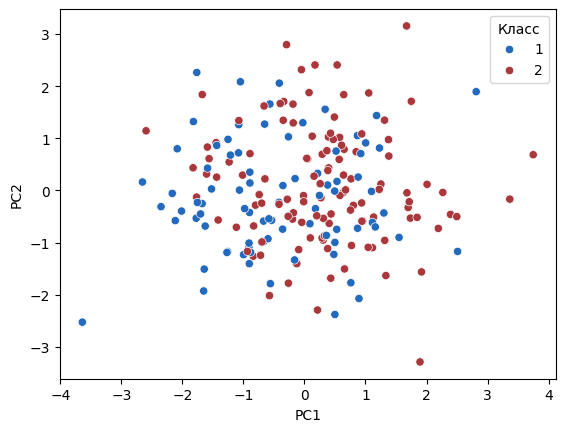

In [42]:
X = data.drop('Класс', axis=1)

sc = StandardScaler()
sc.fit(X.astype('float64'))
Xsc = sc.transform(X.astype('float64'))
Xsc = pd.DataFrame(Xsc, index=X.index, columns=X.columns)

skpcamod = PCA().fit(X=Xsc)
scores_skl = pd.DataFrame(skpcamod.transform(Xsc)[:, :2])
scores_skl.columns = ['PC1', 'PC2']

sns.scatterplot(x = 'PC1', y = 'PC2', data = scores_skl, hue = data['Класс'], palette='vlag')

# Построить график зависимости доли объясненной дисперсии от номера главной компоненты.


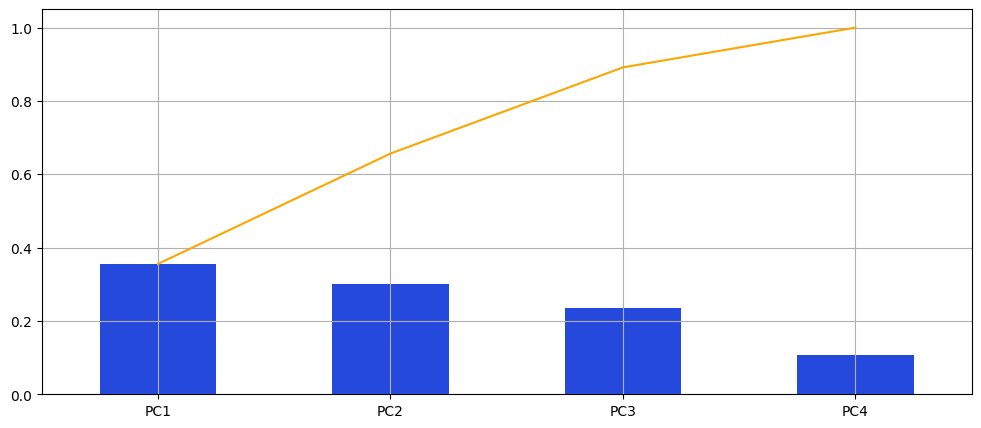

In [43]:
cov_mat = np.cov(Xsc.T)
u,s,v = np.linalg.svd(cov_mat)

np.where(s > s.sum()/len(s))[0]
scores_svd = pd.DataFrame(Xsc @ u[:,:2])
scores_svd.columns = ['PC1','PC2']
pd.Series(s/s.sum(), index = [f'PC{x+1}' for x in range(Xsc.shape[1])]).plot.bar( color = '#2549dd', figsize = (12, 5))
pd.Series((s/s.sum()).cumsum(), index = [f'PC{x+1}' for x in range(Xsc.shape[1])]).plot( color = 'orange')
plt.grid()